# Data Science Project: Wine Quality Dataset

### Predicting Wine Quality from its Chemical features

##### Importing the required libraries for the analysis.

In [205]:
import numpy as np
import pandas as pd
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#reading the dataset from the computer location.
data = pd.read_csv('C:/Users/savan/Desktop/DS/Projects/winequality.csv')

In [46]:
#Understanding and getting to know the data and how it looks.
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
#Getting the shape of the Dataframe
data.shape

(1599, 12)

In [47]:
#Checking in about the null values in a dataframe
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [48]:
#Checking the data types and the number of entries in each of the column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [49]:
#Getting the descriptive statistics of the all the numerical columns of a dataframe like Mean, Median, Std Deviation, Min, etc.
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [3]:
corr = data.corr()
corr.style.background_gradient().set_precision(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,-0.26,0.67,0.11,0.094,-0.15,-0.11,0.67,-0.68,0.18,-0.062,0.12
volatile acidity,-0.26,1,-0.55,0.0019,0.061,-0.011,0.076,0.022,0.23,-0.26,-0.2,-0.39
citric acid,0.67,-0.55,1,0.14,0.2,-0.061,0.036,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.0019,0.14,1,0.056,0.19,0.2,0.36,-0.086,0.0055,0.042,0.014
chlorides,0.094,0.061,0.2,0.056,1,0.0056,0.047,0.2,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.011,-0.061,0.19,0.0056,1,0.67,-0.022,0.07,0.052,-0.069,-0.051
total sulfur dioxide,-0.11,0.076,0.036,0.2,0.047,0.67,1,0.071,-0.066,0.043,-0.21,-0.19
density,0.67,0.022,0.36,0.36,0.2,-0.022,0.071,1,-0.34,0.15,-0.5,-0.17
pH,-0.68,0.23,-0.54,-0.086,-0.27,0.07,-0.066,-0.34,1,-0.2,0.21,-0.058
sulphates,0.18,-0.26,0.31,0.0055,0.37,0.052,0.043,0.15,-0.2,1,0.094,0.25


In [4]:
#Finding the unique values in our feature variable
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [55]:
#Let's check how many different wines have the different ratings
data.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

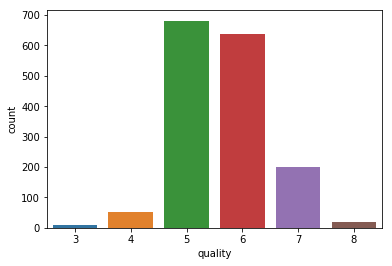

In [62]:
#Visually representing the count using Bar plot
sns.countplot(x = 'quality', data = data)

In [8]:
check = [ (data['quality'] > 7), (data['quality'] < 4)]
rating = ['good', 'bad']
data['rating'] = np.select(check, rating, default='average')

In [66]:
#Counting the rating of different wines based on the criteria we decided earlier.
data.rating.value_counts()

average    1571
good         18
bad          10
Name: rating, dtype: int64

In [68]:
#Let's check how the mean of the all the feature variables varies by the different rating.
data.groupby('rating').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8.316550,0.526747,0.270236,2.537747,0.087461,15.935710,46.754297,0.996760,3.311063,0.657454,10.406811,5.625716
bad,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000,3.000000
good,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444,8.000000


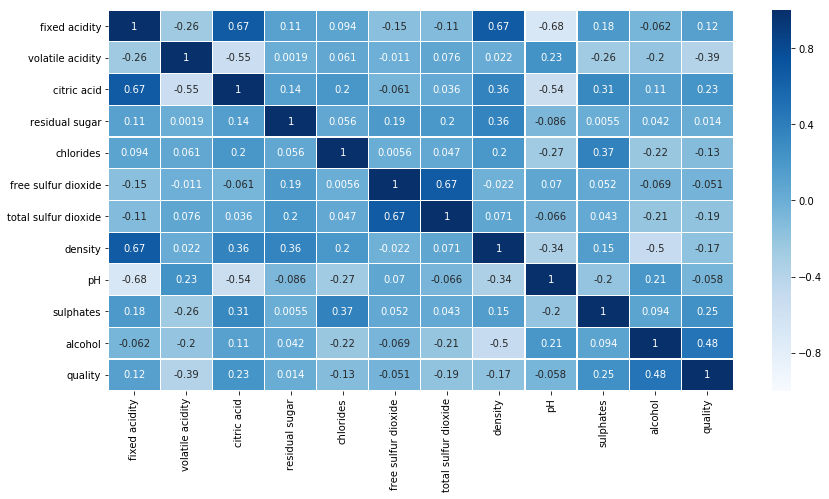

In [82]:
#Finding the correlation between the different features of the dataframe
corr = data.corr()
plt.figure(figsize = (14, 7))
sns.heatmap(corr, annot=True, linewidths=0.1, vmin = -1, cmap = 'Blues')

In [33]:
#Exploring more our response variable 'quality' and looking at how it is correlated with other features
corr['quality'].sort_values(ascending = False, kind= 'quicksort')

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

[Text(0,0.5,'Alcohol'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Alcohol % in different wine quality types')]

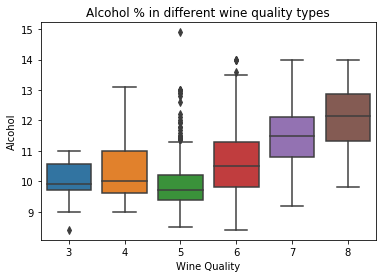

In [89]:
bx1 = sns.boxplot(x = 'quality', y = 'alcohol', data = data)
bx1.set(xlabel = 'Wine Quality', ylabel = 'Alcohol', title = 'Alcohol % in different wine quality types')

[Text(0,0.5,'Alcohol'),
 Text(0.5,0,'Wine Rating'),
 Text(0.5,1,'Alcohol % in different wine rating')]

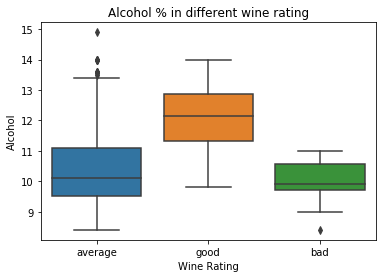

In [9]:
bx1 = sns.boxplot(x = 'rating', y = 'alcohol', data = data)
bx1.set(xlabel = 'Wine Rating', ylabel = 'Alcohol', title = 'Alcohol % in different wine rating')

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Alcohol'),
 Text(0.5,0,'Wine Rating'),
 Text(0.5,1,'Alcohol % in different wine rating')]

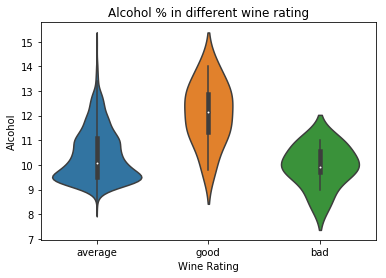

In [12]:
bx1 = sns.violinplot(x = 'rating', y = 'alcohol', data = data)
bx1.set(xlabel = 'Wine Rating', ylabel = 'Alcohol', title = 'Alcohol % in different wine rating')

[Text(0,0.5,'volatile acidity'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Amount of volatile acidity in different wine quality types')]

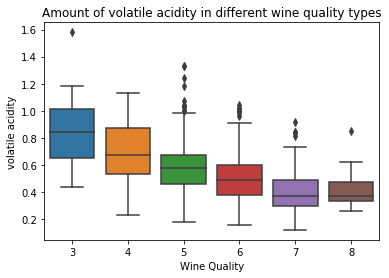

In [5]:
bx2 = sns.boxplot(x = 'quality', y = 'volatile acidity', data = data)
bx2.set(xlabel = 'Wine Quality', ylabel = 'volatile acidity', title = 'Amount of volatile acidity in different wine quality types')

[Text(0,0.5,'volatile acidity'),
 Text(0.5,0,'Wine Rating'),
 Text(0.5,1,'Amount of volatile acidity in different wine rating')]

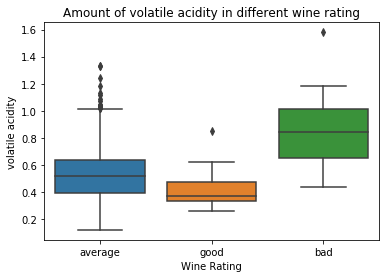

In [10]:
bx2 = sns.boxplot(x = 'rating', y = 'volatile acidity', data = data)
bx2.set(xlabel = 'Wine Rating', ylabel = 'volatile acidity', title = 'Amount of volatile acidity in different wine rating')

[Text(0,0.5,'citric acid'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Amount of citric acid in different wine quality types')]

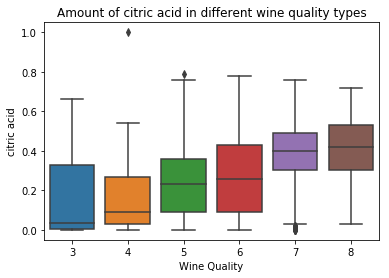

In [6]:
bx3 = sns.boxplot(x = 'quality', y = 'citric acid', data = data)
bx3.set(xlabel = 'Wine Quality', ylabel = 'citric acid', title = 'Amount of citric acid in different wine quality types')

[Text(0,0.5,'citric acid'),
 Text(0.5,0,'Wine Rating'),
 Text(0.5,1,'Amount of citric acid in different wine rating')]

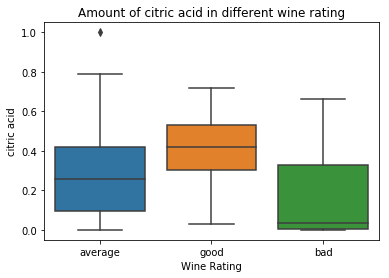

In [11]:
bx3 = sns.boxplot(x = 'rating', y = 'citric acid', data = data)
bx3.set(xlabel = 'Wine Rating', ylabel = 'citric acid', title = 'Amount of citric acid in different wine rating')

[Text(0,0.5,'sulphates'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Amount of sulphates in different wine quality types')]

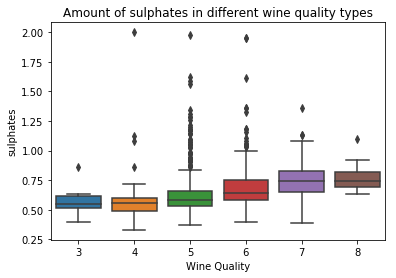

In [7]:
bx4 = sns.boxplot(x = 'quality', y = 'sulphates', data = data)
bx4.set(xlabel = 'Wine Quality', ylabel = 'sulphates', title = 'Amount of sulphates in different wine quality types')

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


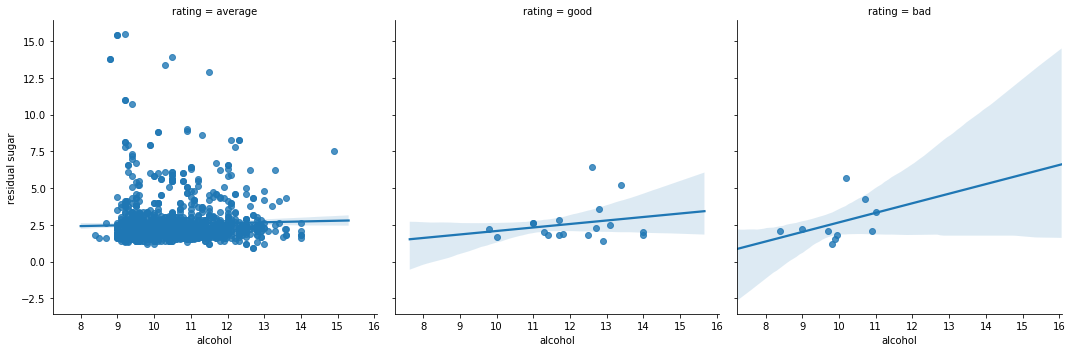

In [21]:
sns.lmplot(y = 'residual sugar', x = 'alcohol', data = data, col='rating')

In [26]:
data.rating.value_counts(normalize = True)

average    0.982489
good       0.011257
bad        0.006254
Name: rating, dtype: float64

###### Even though the regression analysis shows that  for the average and good rated wines, the residual sugar remains pretty constant. But for the bad rated wines, the amount of residual sugar is pretty high. We can confirm from the analysis that, the amount of residual sugar does affect the quality or rating of the wines.

###### But let's not directly jump to that conclusion, let's do some research on how many data points are considered in all of the three different ratings. It says that 98.2% of the wines are having average rating while just 1.1% and 0.06% are having the good and bad ratings respectively. If our dataset is a unbiased sample, overall it is very less probability that a particular wine will be having a good and bad rating and very highly likely it will have a rating between 4 and 7. It may happened here that it is a biased sample and that's is why it is giving a biased result. In that case, it may be hard to frame a good conclusion. 

###### The same concept applies to the rest of the analysis. The trend in the good and bad rating may be a reason for less number of datapoints available in that set.

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


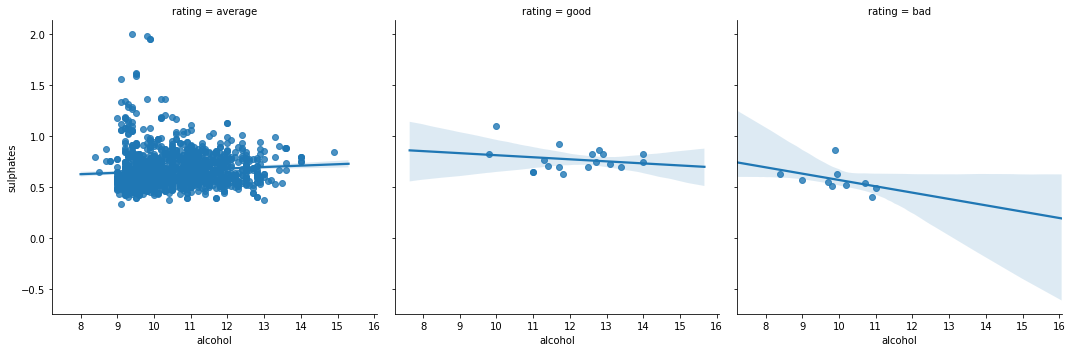

In [19]:
sns.lmplot(y = 'sulphates', x = 'alcohol', data = data, col = 'rating')

###### The above analysis shows that the rating may be lower for a wine with slightly less amount of sulphates. There are some outliers of average wines having close to 2.0 sulphates.

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


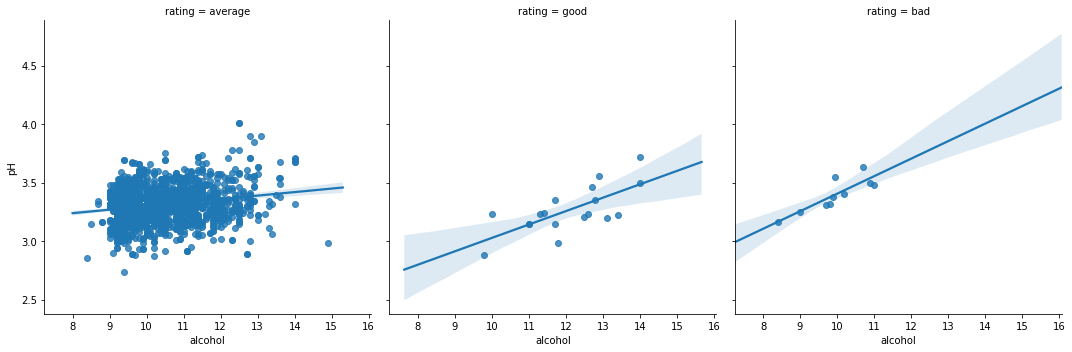

In [23]:
sns.lmplot(y = 'pH', x = 'alcohol', data = data, col = 'rating')

In [31]:
y, X = dmatrices('quality ~ alcohol', data = data, return_type= 'dataframe')
print('X:', type(X))
print(X.columns)
model = smf.OLS(y, X)
result = model.fit()
result.summary()

X: <class 'pandas.core.frame.DataFrame'>
Index(['Intercept', 'alcohol'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Fri, 16 Nov 2018   Prob (F-statistic):           2.83e-91
Time:                        14:59:29   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8750      0.175     10.732      0.000       1.532       2.218
alcohol        0.3608      0.017     21.639      0.000       0.328       0.394
==============================================================================
Omnibus:                       38.501   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.758
Skew:                          -0.154   Prob(JB):                     2.62e-16
Kurtosis:                       3.991   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
result.params

Intercept    1.874975
alcohol      0.360842
dtype: float64

In [117]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [165]:
cols = ['sulphates']

In [166]:
X = data[cols]
y = data['quality']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
regmodel = LinearRegression()
regmodel.fit(X_train, y_train)
ypred = regmodel.predict(X_test)
print('MSE:', metrics.mean_squared_error(y_test, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

MSE: 0.5448576648306698
RMSE: 0.7381447451758156


In [163]:
print('Intercept:', regmodel.intercept_)
print('Coefficients:', regmodel.coef_)

Intercept: 5.404853962088465
Coefficients: [0.90057565]


In [164]:
regmodel.predict(0.04)

array([5.44087699])

In [153]:
loop = data.alcohol
alcohol_pred = []
for i in loop:
    x = regmodel.predict(i)
    alcohol_pred.append(x)

In [154]:
alcohol_pred = pd.Series(alcohol_pred)

Text(0.5,1,'Alcohol percentage vs Wine Quality')

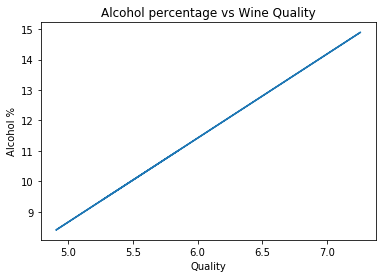

In [159]:
plt.plot(alcohol_pred, data.alcohol)
plt.xlabel('Quality')
plt.ylabel('Alcohol %')
plt.title('Alcohol percentage vs Wine Quality')

In [174]:
data['goodbad'] = (data['quality'] > 4).astype(np.float32)

In [178]:
data.goodbad.value_counts(normalize=True)

1.0    0.9606
0.0    0.0394
Name: goodbad, dtype: float64

In [223]:
X = data[['alcohol']]
y = data['goodbad']

#### Logistic Regression

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
mymodel = LogisticRegression()
mymodel.fit(X_train, y_train)
log_pred = mymodel.predict(X_test)
print(' Logistic Reg. Accuracy Score:', metrics.accuracy_score(y_test, log_pred))

 Logistic Reg. Accuracy Score: 0.9575


In [203]:
mymodel.predict(9.4)

array([1.], dtype=float32)

##### kNN Clustering

In [226]:
X = data[['alcohol']]
y = data['goodbad']

In [235]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print('KNN Accuracy Score:', metrics.accuracy_score(knn_pred, y_test))

KNN Accuracy Score: 0.9575


In [230]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(knn_pred, y_test))

In [231]:
print(scores)

[0.9375, 0.8825, 0.9575, 0.9575, 0.9575, 0.9575, 0.9575, 0.9575, 0.9575, 0.9575, 0.9575, 0.9575, 0.9575, 0.9575, 0.9575, 0.9575, 0.9575, 0.9575, 0.9575, 0.9575, 0.9575, 0.9575, 0.9575, 0.9575, 0.9575]


Text(0,0.5,'Testing Accuracy')

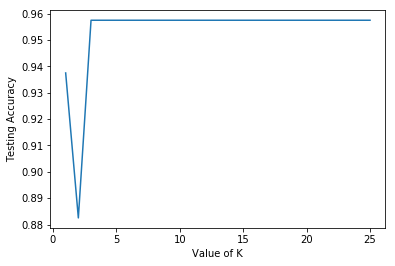

In [232]:
plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')

In [236]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodbad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.960600
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.194605
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


#### Conclusion

#### The above machine learning model like Linear Regression are used to predict the quality of the wines ranging from 3 and 8. Logistic Regression is used to predict that the wine is above the average or not, while kNN classification is used to classify the wines based on its nearest neighbors.